In [1]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Now you can access the OpenAI API key using os.getenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
langchain_api_key = os.getenv("LANGCHAIN_API_KEY")

In [2]:
import pandas as pd



df = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:

from langchain_experimental.agents import create_pandas_dataframe_agent
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain.agents.agent_types import AgentType
import os
from langchain_openai import OpenAI


agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

# agent = create_pandas_dataframe_agent(
#     ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
#     df,
#     verbose=True,
#     agent_type=AgentType.OPENAI_FUNCTIONS,
# )

agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)891891 is the number of rows in the dataframe
Final Answer: 891

> Finished chain.


'891'

In [18]:
agent.invoke("what are the column names in the data?")



> Entering new AgentExecutor chain...
Thought: I need to access the column names in the dataframe.
Action: python_repl_ast
Action Input: df.columnsIndex(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')I now know the final answer
Final Answer: The column names in the data are 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'.

> Finished chain.


{'input': 'what are the column names in the data?',
 'output': "The column names in the data are 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'."}

In [19]:
agent.invoke("how many people have more than 3 siblings")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where the SibSp column is greater than 3, and then count the number of rows.
Action: python_repl_ast
Action Input: len(df[df['SibSp'] > 3])3030 people have more than 3 siblings.
Final Answer: 30

> Finished chain.


{'input': 'how many people have more than 3 siblings', 'output': '30'}



> Entering new AgentExecutor chain...
Thought: I need to use the pandas plot function to create a bar plot
Action: python_repl_ast
Action Input: df['Survived'].value_counts().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: A bar plot showing the count of passengers in each survival category.

> Finished chain.


'A bar plot showing the count of passengers in each survival category.'

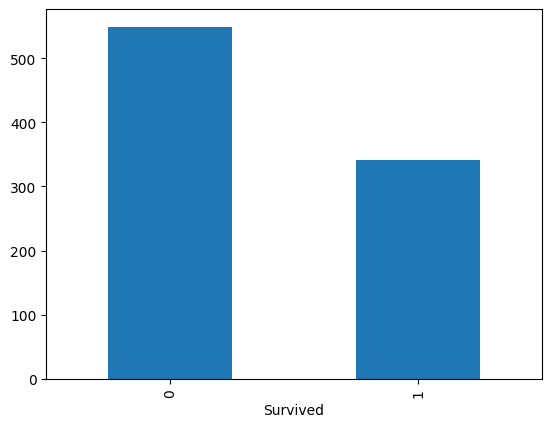

In [22]:
# import matplotlib.pyplot as plt
agent.run("bar plot for surviaval category count")



> Entering new AgentExecutor chain...
Thought: I need to use the value_counts() function to get the frequency of each categorical column, and then use the plot.bar() function to create a bar plot.
Action: python_repl_ast
Action Input: df['Survived'].value_counts().plot.bar()Axes(0.125,0.11;0.775x0.77)I need to repeat this process for each categorical column.
Action: python_repl_ast
Action Input: df['Pclass'].value_counts().plot.bar()Axes(0.125,0.11;0.775x0.77)I need to repeat this process for each categorical column.
Action: python_repl_ast
Action Input: df['Sex'].value_counts().plot.bar()Axes(0.125,0.11;0.775x0.77)I need to repeat this process for each categorical column.
Action: python_repl_ast
Action Input: df['Embarked'].value_counts().plot.bar()Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: A bar plot for the frequency of all categorical columns in the dataframe.

> Finished chain.


'A bar plot for the frequency of all categorical columns in the dataframe.'

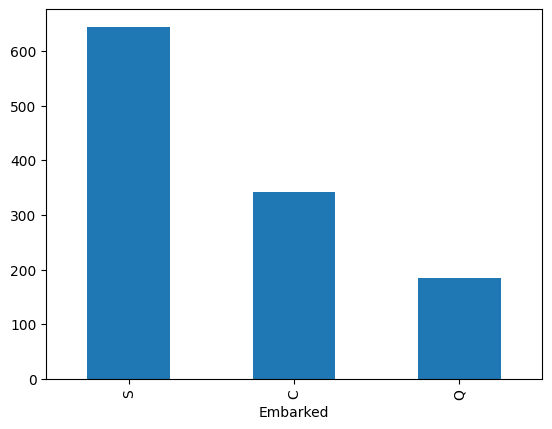

In [24]:
# import matplotlib.pyplot as plt
agent.run("bar plot for all categorical columns frequency")